<a href="https://colab.research.google.com/github/MWSOliveira/Projeto_ImersaoIA/blob/main/Projeto_Assistente_de_Vestuario_com_acessibilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assistente de Vestuário com acessibilidade

Você vai experimentar agora um **assistente de vestuário** com objetivo de auxiliar o público em geral, mas principalmente pessoas com baixa visão, cegas ou até com alterações na interpretação de cores, como daltonismo.

Confesso que para este desenvolvedor já é difícil fazer combinações coerentes de cores de camiseta e bermuda. Agora, imagine como seriam essas combinações quando não vemos as cores do modo esperado pela maioria?

Sendo assim, **esse assistente recebe como entrada o endereço de uma imagem digital e responde com uma descrição considerando suas cores, modelo, estilo, gênero e idade indicativa, mas também sugerindo utilização conforme clima.**

Em seguida, pode-se interagir com o chat pedindo conselhos sobre o uso da peça e sugestões de combinação com acessórios e calçados. Ou então, pode-se iniciar uma nova descrição inserindo novo endereço de imagem.

Os códigos criados aqui foram adaptados principalmente do "chatbot" criado na Aula 04 da Imersão IA da Alura. Considerando um "pré-prompt" para o caso em que a entrada é uma imagem, baseado nas orientações de design de prompt da Aula 02.

Naturalmente, imagens e mensagens fora do contexto da proposta poderão levar a alucinações e respostas sem sentido.

Para melhor acessibilidade, futuramente, pretendo oportunizar inputs diretamente de uma câmera de celular e outputs em áudio.

Agora, **rode cada célula e aproveite!**



In [42]:
#Instalando o SDK do Google
!pip install -q -U google-generativeai

In [50]:
#Bibliotecas e configurações iniciais
import google.generativeai as genai
from pathlib import Path
import hashlib

GOOGLE_API_KEY=""#"INSIRA_SUA_API_KEY"
genai.configure(api_key=GOOGLE_API_KEY)

In [44]:
#Copiado do Código da aula 4
#Melhorando a visualização
#Código disponível em https://ai.google.dev/tutorials/python_quickstart#import_packages
import textwrap
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [45]:
# Definindo parâmetros do Modelo
generation_config = {
  "temperature": 1,
  "top_p": 0.95,
  "top_k": 0,
  #"max_output_tokens": 8192,
}

safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_NONE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_NONE"
  },
]

In [46]:
#Listando os modelos disponíveis
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [47]:
#Inicializando modelo
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,
                              safety_settings=safety_settings)

# Visualizando imagens
Antes de iniciarmos a interação com o modelo, vamos testar o acesso a imagens que estejam na pasta em que o código está rodando. Usando o Colab, basta:

*   clicar no ícone "Arquivos"
*   clicar com botão direito e "Nova Pasta"
*   nomear como "images"
*   clicar com botão direito em "images"
*   selecionar "upload"
*   selecionar as imagens desejadas.

Para carregá-las no código, basta:

*   clicar na pasta "images"
*   clicar com botão direito no arquivo desejado
*   selecionar opção "copiar caminho"
*   depois, dê 'CTRL+V' no local desejado do código.

Utilize a célula abaixo como teste e visualize as imagens carregadas por você.


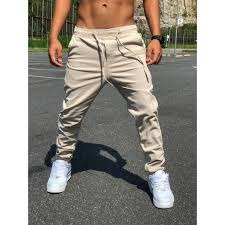

In [48]:
import cv2

img = "/content/images/calcamcas.jpeg" #altere esta entrada com o endereço da imagem
img = cv2.imread(img,cv2.IMREAD_UNCHANGED) # reads image
cv2_imshow(img)

# Interação com modelo

Ao rodar esta célula, inicia-se a interação com o modelo em formato de chat, com prompt pré-definido.

A primeira interação necessariamente deve ser um endereço de imagem. Para isso,

1.   crie a pasta 'imagens'
2.   adicione arquivos a ela
3.   e entre com '/content/images/calcamcas.jpeg', por exemplo.

As demais interações podem ser uma pergunta adicional sobre a roupa ou um novo endereço de imagem. Tente algo como "sugira acessórios para cabeça", "/content/images/camisamasc.jpeg" ou ainda "sugira acessórios para todas as imagens" e o sistema atualizará respostas anteriores.

Claro que se você fugir do "tema", o modelo irá alucinar nas respostas.

Utilize fim para finalizar e aproveite! Após esta célula, há outra para visualização das imagens.

In [49]:
#Adaptado da Aula 4 usando estratégias design de prompt Aula 2
#cria modelo de chat com histórico "limpo"
chat = model.start_chat(history=[])

#recebe primeira interação (necessáriamente um endereço)
flag = 'in'
prompt = input('Entre com endereço da imagem: ')

#com verificação "flag+while" conferindo se há "/" na entrada
while flag == 'in':
  if '/' in prompt:
      prompt_parts = [genai.upload_file(prompt),
                      "Descreva o sentimento que esta roupa demonstra. Descreva suas cores, estilo, gênero e idade indicativa. Sugira uma ocasião de uso considerando clima. Utilize até 30 palavras.",
                      ]
      flag = 'out'
  else:
    prompt = input('Entre necessariamente com um endereço de imagem: ')

#looping "while" para continuar interações até que entre com fim
while prompt != "fim":
  response = chat.send_message(prompt_parts)
  display(to_markdown(response.text))
  print('-------------------------------------------')

  prompt = input('Digite uma pergunta, um novo endereço ou fim para finalizar\n')

  #verificação se for um endereço é necessário upload do novo arquivo de imagem
  if '/' in prompt:
    prompt_parts.append(genai.upload_file(prompt))
    prompt_parts.append("Descreva o sentimento que esta roupa demonstra. Descreva suas cores, estilo, gênero e idade indicativa. Sugira uma ocasião de uso considerando clima. Utilize até 30 palavras.")
  else:
    prompt_parts.append(prompt)



Entre com endereço da imagem: /content/images/calcamcas.jpeg


> A roupa transmite um estilo casual e despojado. Na cor bege, tem um estilo esportivo, ideal para homens jovens em dias quentes. Perfeito para um passeio no parque ou encontro com amigos. 


-------------------------------------------
Digite uma pergunta, um novo endereço ou fim para finalizar
sugira um modelo de camiseta que combine


> A calça bege transmite um estilo casual e moderno, ideal para homens jovens em dias quentes. Perfeita para um passeio, combina com uma camiseta básica branca ou preta. 


-------------------------------------------
Digite uma pergunta, um novo endereço ou fim para finalizar
fica bom com camisa amarela?


> A calça bege transmite um estilo casual e moderno, ideal para homens jovens em dias quentes. Perfeita para um passeio, combina com uma camiseta básica branca ou preta. Uma camisa amarela pode criar um contraste vibrante e estiloso. 


-------------------------------------------
Digite uma pergunta, um novo endereço ou fim para finalizar
fim
